## Data Cleaning and Pre-processing

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score,log_loss
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
import random

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

#model librries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the data and checking dimensions
nasa = pd.read_csv(r'C:\Users\nesha\Desktop\Metis\Classification\Final_Project\nasa.csv')
print(nasa.shape)
nasa.head()

(4687, 40)


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True


In [3]:
#df columns
nasa.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [4]:
#nasa dataset information
nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   float64
 13  Rel

In [5]:
#we don't have null values
#removing repeated fetures with different units. Sticking to american units.
repeated_columns = [x for x in nasa if 'km' in x.lower() or 'feet' in x.lower() or 'kilometers' in x.lower()]
repeated_columns

['Est Dia in KM(min)',
 'Est Dia in KM(max)',
 'Est Dia in Feet(min)',
 'Est Dia in Feet(max)',
 'Relative Velocity km per sec',
 'Relative Velocity km per hr',
 'Miss Dist.(kilometers)']

In [6]:
#value counts for some of unfamiliar columns
print("Equinox:", nasa['Equinox'].value_counts())
print("Orbiting Body:", nasa['Orbiting Body'].value_counts())

Equinox: J2000    4687
Name: Equinox, dtype: int64
Orbiting Body: Earth    4687
Name: Orbiting Body, dtype: int64


In [7]:
#Equinox and Orbiting Body columns have the same value for all observations, thus we can drop the
#droping columns which we wont need
nasa = nasa.drop(columns = ['Est Dia in KM(min)',
                            'Est Dia in KM(max)',
                             'Est Dia in Feet(min)',
                             'Est Dia in Feet(max)',
                             'Relative Velocity km per hr',
                             'Miss Dist.(kilometers)',
                            'Est Dia in M(min)',
                            'Est Dia in M(max)',
                            'Equinox',
                            'Orbiting Body'
                            ])

print(nasa.shape)
nasa.head()

(4687, 30)


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in Miles(min),Est Dia in Miles(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miles per hour,Miss Dist.(Astronomical),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,3703080,21.6,0.079051,0.176763,1/1/1995,7.889470e+11,6.115834,13680.50994,0.419483,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,True
1,3723955,3723955,21.3,0.090762,0.202951,1/1/1995,7.889470e+11,18.113985,40519.17311,0.383014,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,False
2,2446862,2446862,20.3,0.143849,0.321655,1/8/1995,7.895520e+11,7.590711,16979.66180,0.050956,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,True
3,3092506,3092506,27.4,0.005469,0.012229,1/15/1995,7.901570e+11,11.173875,24994.83986,0.285322,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,False
4,3514799,3514799,21.6,0.079051,0.176763,1/15/1995,7.901570e+11,9.840831,22012.95498,0.407832,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,True


Target Count:
 False    3932
True      755
Name: Hazardous, dtype: int64


Text(0.5, 1.0, 'Class Distributions \n (Hazardous: True or False)')

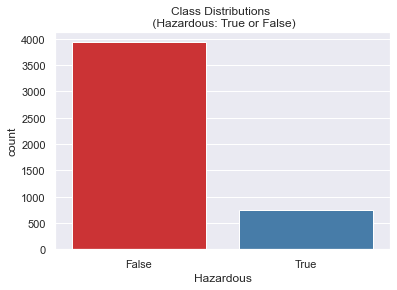

In [8]:
#Let's look at the Hazardous column (target)
print("Target Count:\n", nasa['Hazardous'].value_counts())

#plotting Hazardous class imbalancement
sns.countplot('Hazardous', data=nasa, palette= 'Set1')
plt.title('Class Distributions \n (Hazardous: True or False)', fontsize=12)

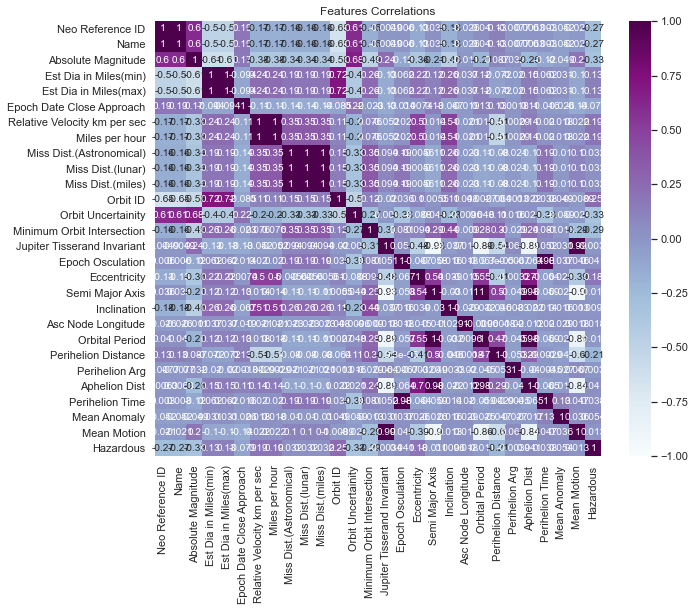

In [9]:
#corellations of numeric features
def corr_plot(data):
    f, ax = plt.subplots(figsize=(10,8))
    sns.heatmap(data.corr(),cmap="BuPu", annot=True, vmin=-1, vmax=1)
    plt.title("Features Correlations")

corr_plot(nasa)

It seems that some of the columns have correlation of 1 with each ogther. Thus, we can conclude that some of these features contain the same values/information (some in different units). So we can drop some of them and only keep one physical quantity each group.

In [10]:
#checking our columns data type once more
nasa.dtypes

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Close Approach Date              object
Epoch Date Close Approach       float64
Relative Velocity km per sec    float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(miles)               float64
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64
Jupiter Tisserand Invariant     float64
Epoch Osculation                float64
Eccentricity                    float64
Semi Major Axis                 float64
Inclination                     float64
Asc Node Longitude              float64
Orbital Period                  float64
Perihelion Distance             float64
Perihelion Arg                  float64


In [11]:
num_features = nasa[['Neo Reference ID', 'Name', 'Absolute Magnitude',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(miles)', 'Orbit ID', 
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',]]


#calculating VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = num_features.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(num_features.values, i)
                          for i in range(len(num_features.columns))]
  
print(vif_data)

                         Feature           VIF
0               Neo Reference ID           inf
1                           Name           inf
2             Absolute Magnitude  4.445262e+00
3          Est Dia in Miles(min)           inf
4          Est Dia in Miles(max)  9.007199e+15
5      Epoch Date Close Approach  3.999961e+01
6   Relative Velocity km per sec           inf
7                 Miles per hour           inf
8       Miss Dist.(Astronomical)  2.047091e+14
9              Miss Dist.(lunar)  1.732154e+14
10             Miss Dist.(miles)  1.732154e+14
11                      Orbit ID  3.090501e+00
12            Orbit Uncertainity  2.404058e+00
13    Minimum Orbit Intersection  2.144339e+00
14   Jupiter Tisserand Invariant  1.284131e+03
15              Epoch Osculation  2.630349e+01
16                  Eccentricity  1.899370e+01
17               Semi Major Axis  3.002400e+15
18                   Inclination  5.313868e+00
19            Asc Node Longitude  1.007830e+00
20           

In [12]:
#removing some columns with infinity VIF 
nasa = nasa.drop(['Neo Reference ID', 'Name','Est Dia in Miles(max)',
                  'Relative Velocity km per sec','Miss Dist.(Astronomical)', 'Miss Dist.(lunar)'], axis=1)

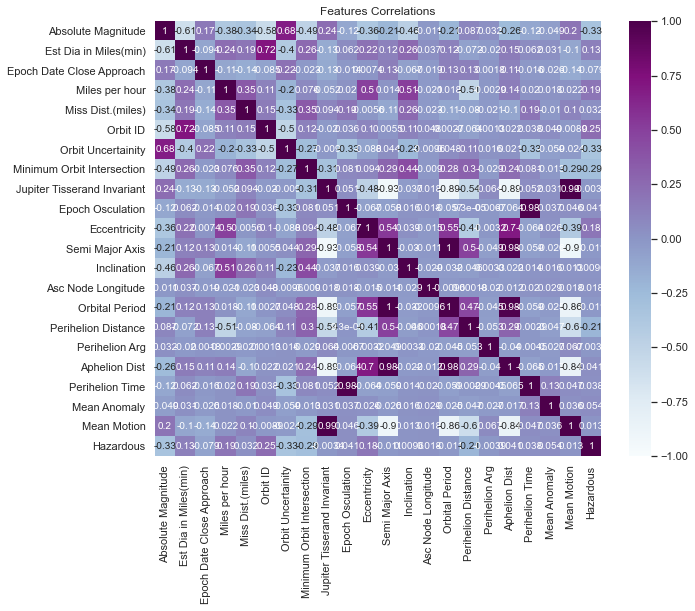

In [13]:
#Now let's plot the correlation heatmap once more
corr_plot(nasa)

We can see that there are still some strong correlations between some of the features. So Let's look into couple of them:

* Semi Major Axis and Orbiral Period have correlation of 1. Semi Major Axis is "One half of the major axis of the elliptical orbit; also the mean distance from the Sun" whereas Orbital Period mean "The time it takes an orbiting body to make one complete revolution around the Sun." Obviously they both are measurements of the same concept. Thus we can drop one!

* Jupyter Tisserand Invariant has also a close correlation with Mean Motion.The value of Tisserand's criterion is used to classify different types of comet's and asteroids into dynamical groups. Here we have the Tisserand Invariant with respect to Jupiter.So it will make sense for this feature to have a high correlation with the Mean Motion! Since the Mean Motion of the asteroid can define the Tisserand Invariant with respect to Jupiter! We can keep the Mean Motion and drop the other one!

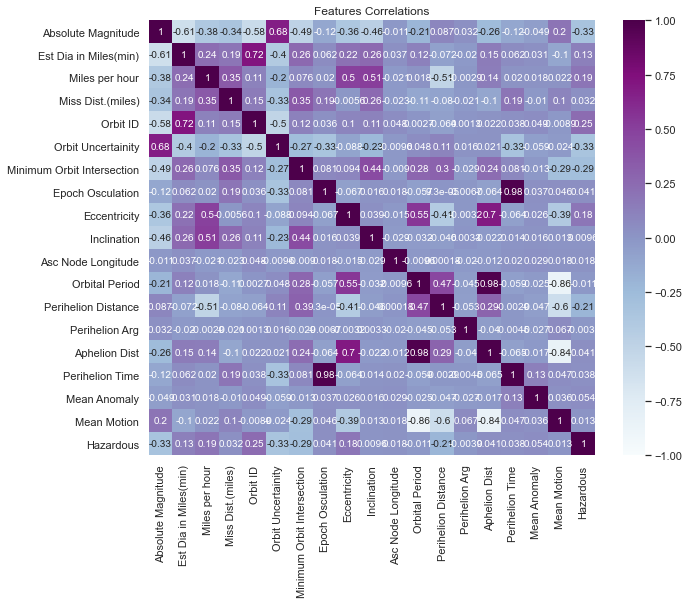

In [14]:
#dropping more of highly correlated columns as discussed above. Also dropping Epoc Date Close Approach and other date columns as it has low corr.
nasa = nasa.drop(['Semi Major Axis', 'Jupiter Tisserand Invariant','Epoch Date Close Approach','Close Approach Date', 'Orbit Determination Date'], axis=1)

#plotting feature correlation plot once more
corr_plot(nasa)

The latest heatmap reveals additional columns which have a very high correlation. However I cannot tell from the titles and definitions if there are in fact a direct relationship between the features. So I am not going to remove any more features for now!

In [15]:
#there should be only a limited number of Orbit IDs so let's take a look
print("Number of unique Orbit IDs:", nasa['Orbit ID'].nunique())
print("\n",nasa['Orbit ID'].value_counts())

Number of unique Orbit IDs: 188

 8      235
9      227
7      212
10     205
11     198
      ... 
86       1
98       1
114      1
122      1
453      1
Name: Orbit ID, Length: 188, dtype: int64


Seems like we have orbit IDs that have single occurance in our dataset! We can reduce this number by analyzing less occurance orbits.

In [16]:
#number of orbit_id that have less than 10 occurances
orbits = nasa['Orbit ID'].value_counts().loc[lambda x: x<10].index.to_list()
print(len(orbits))

120


In [17]:
#there are 120 orbit ids that occur less than 10 times.
#We can replace these orbit ids by renaming them as 'others' so there is no loss of data.

nasa.loc[nasa['Orbit ID'].isin(orbits), 'Orbit ID'] = 'other'

In [18]:
#resetting the index
nasa = nasa.reset_index(drop=True)

In [19]:
#Create a subset of only numerical columns to take look into statistics
nasa_subset = nasa[nasa.columns[~nasa.columns.isin(['Orbit ID', 'Hazardous'])]]
nasa_subset.describe()

,Absolute Magnitude,Est Dia in Miles(min),Miles per hour,Miss Dist.(miles),Orbit Uncertainity,Minimum Orbit Intersection,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,22.267865,0.127135,31251.307268,2.386902e+07,3.516962,0.082320,2.457724e+06,0.382569,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,2.890972,0.229642,16314.209644,1.355279e+07,3.078307,0.090300,9.202975e+02,0.180444,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,11.160000,0.000628,750.489149,1.653462e+04,0.000000,0.000002,2.450164e+06,0.007522,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,20.100000,0.020792,18863.475325,1.240212e+07,0.000000,0.014585,2.458000e+06,0.240858,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,21.900000,0.068850,28896.026390,2.463595e+07,3.000000,0.047365,2.458000e+06,0.372450,10.311836,172.625394,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,24.500000,0.157727,40437.892430,3.570935e+07,6.000000,0.123593,2.458000e+06,0.512411,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,32.100000,9.680682,99841.227830,4.646713e+07,9.000000,0.477891,2.458020e+06,0.960261,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [20]:
nasa.shape

(4687, 19)

In [21]:
#we need to perform one-hot encoding on the Orbit ID column for some models
nasa_encoded= pd.concat([nasa,pd.get_dummies(nasa['Orbit ID'], prefix='Orbit_ID')],axis=1)
nasa_encoded.drop(['Orbit ID'],axis=1, inplace=True)

#converting Hazardous values from True/False to 0/1
nasa_encoded['Hazardous'] = pd.factorize(nasa_encoded['Hazardous'], sort=True)[0]

print(nasa_encoded.shape)
nasa_encoded.head()

(4687, 87)


,Absolute Magnitude,Est Dia in Miles(min),Miles per hour,Miss Dist.(miles),Orbit Uncertainity,Minimum Orbit Intersection,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,...,Orbit_ID_68,Orbit_ID_69,Orbit_ID_73,Orbit_ID_74,Orbit_ID_75,Orbit_ID_78,Orbit_ID_80,Orbit_ID_84,Orbit_ID_97,Orbit_ID_other
0,21.6,0.079051,13680.50994,38993336.0,5,0.025282,2458000.5,0.425549,6.025981,314.373913,...,0,0,0,0,0,0,0,0,0,0
1,21.3,0.090762,40519.17311,35603420.0,3,0.186935,2458000.5,0.351674,28.412996,136.717242,...,0,0,0,0,0,0,0,0,0,0
2,20.3,0.143849,16979.66180,4736657.5,0,0.043058,2458000.5,0.348248,4.237961,259.475979,...,0,0,0,0,0,0,0,0,0,0
3,27.4,0.005469,24994.83986,26522368.0,6,0.005512,2458000.5,0.216578,7.905894,57.173266,...,0,0,0,0,0,0,0,0,0,0
4,21.6,0.079051,22012.95498,37910368.0,1,0.034798,2458000.5,0.210448,16.793382,84.629307,...,0,0,0,0,0,0,0,0,0,0


## Building Model

In [22]:
#defining X and y
X = nasa_encoded.loc[:, nasa_encoded.columns != 'Hazardous']
y = nasa_encoded['Hazardous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [23]:
#base model: Logistic Regression
 
#pipeline avoids leaking the test set into the train set
#seeting a high C for lg to avoid regularization
steps = [('scaler', StandardScaler()), ('lg', LogisticRegression(C=100))]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
 
def class_metrics(y_test, y_pred):
    print("Accuracy: {:6.4f}, \nPrecision: {:6.4f},\nRecall: {:6.4f},\nF1 Score: {:6.4f}".format(accuracy_score(y_test
                                                                                                            , y_pred),
                                                    precision_score(y_test, y_pred), 
                                                     recall_score(y_test, y_pred),
                                                    f1_score(y_test, y_pred) ))

class_metrics(y_test,y_pred)

Accuracy: 0.9488, 
Precision: 0.8278,
Recall: 0.8503,
F1 Score: 0.8389


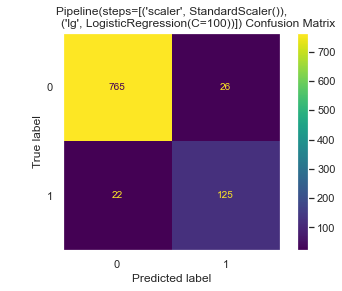

In [24]:
#confusion matrix for logistic regression
def confusion_plot(model, X_test, y_test):
    plot_confusion_matrix(model, X_test, y_test)
    plt.grid(False)
    plt.title(f'{model} Confusion Matrix')
    plt.show()
    
confusion_plot(pipeline, X_test, y_test)

As you can see there are 22 False Negatives in our prediction using the base model!!

How does this log loss compare to the baseline log loss?

In [25]:
baseline_prob = np.mean(y_train)
print("baseline log-loss: ", baseline_prob)

y_prob_pred = pipeline.predict_proba(X_test)[:,1]
print("model log-loss:", log_loss(y_test,y_prob_pred))

baseline log-loss:  0.16217658042144573
model log-loss: 0.12684415614132624


 One way to improve our metrics is to take care of the class imbalance! Here I'm going to use Synthetic Minority Oversampling Technique, or SMOTE for short.

In [26]:
#creating equal balance of classes using SMOTE

over = SMOTE(random_state = 34) 
X_train_res1, y_train_res1 = over.fit_sample(X_train, y_train.ravel()) 
  
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res1 == 0))) 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res1 == 1))) 

After OverSampling, counts of label '0': 3141
After OverSampling, counts of label '1': 3141


In [27]:
#Let's repeat the Logistic model post SMOTE
steps = [('scaler', StandardScaler()), ('lg', LogisticRegression(C=100))]
pipeline2 = Pipeline(steps)
pipeline2.fit(X_train_res1, y_train_res1.ravel())
y_pred = pipeline2.predict(X_test)

class_metrics(y_test,y_pred)

Accuracy: 0.9478, 
Precision: 0.8182,
Recall: 0.8571,
F1 Score: 0.8372


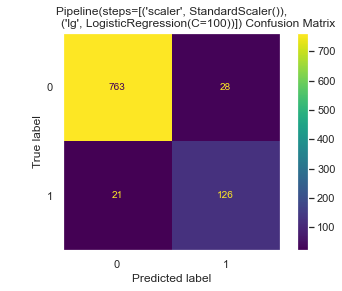

In [28]:
confusion_plot(pipeline2, X_test, y_test)

To my surprise using SMOTE sampling didn't really helped much!

In [29]:
#SVM model

steps = [('scaler', StandardScaler()), ('SVM', SVC())]
svm_pipe = Pipeline(steps)
svm_pipe.fit(X_train_res1, y_train_res1.ravel())
y_pred = svm_pipe.predict(X_test)

class_metrics(y_test,y_pred)

Accuracy: 0.8827, 
Precision: 0.7229,
Recall: 0.4082,
F1 Score: 0.5217


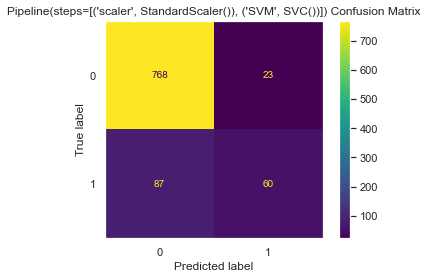

In [30]:
confusion_plot(svm_pipe, X_test, y_test)

Seems like SVM is not the model we're looking for today :)

In [31]:
#decision tree

#hyperparameter options
dt_params = {'max_depth': np.arange(0, 20, 1),
                  'criterion': ['gini', 'entropy'],
                  'min_samples_leaf': np.arange(0, 1, 0.05)
                }

#GrideSearcCV
dt_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=dt_params,
                            scoring='accuracy', cv=5)
dt_grid.fit(X_train, y_train)
dt_opt_param = dt_grid.best_params_
dt_best_score = (dt_grid.best_score_*100).round(2)
dt_best_est = dt_grid.best_estimator_
dt_feat_imp = dt_best_est.feature_importances_

#Score on holdout data
dt_holdout_score = (dt_grid.score(X_test, y_test)*100).round(2)

print('Optimal Hyperparameters:')
print(dt_opt_param)
print('Optimal Estimator:')
print(dt_best_est)
print('\n')
print('Training Accuracy {}'.format(dt_best_score))
print('Testing Accuracy {}'.format(dt_holdout_score))

Optimal Hyperparameters:
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 0.05}
Optimal Estimator:
DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.05)


Training Accuracy 99.47
Testing Accuracy 99.36


In [32]:
#let's use SMOTE sets

dt_grid.fit(X_train_res1, y_train_res1) #using SMOTE sets
dt_opt_param = dt_grid.best_params_
dt_best_score = (dt_grid.best_score_*100).round(2)
dt_best_est = dt_grid.best_estimator_
dt_feat_imp = dt_best_est.feature_importances_

#Score on holdout data
dt_holdout_score = (dt_grid.score(X_test, y_test)*100).round(2)

print('Optimal Hyperparameters:')
print(dt_opt_param)
print('Optimal Estimator:')
print(dt_best_est)
print('\n')
print('Training Accuracy {}'.format(dt_best_score))
print('Testing Accuracy {}'.format(dt_holdout_score))

Optimal Hyperparameters:
{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 0.05}
Optimal Estimator:
DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=0.05)


Training Accuracy 99.55
Testing Accuracy 99.47


Seems like it helped just a little! Oh well! from now on I use the training sets generated using SMOTE!

In [33]:
#creating the Decision Tree once more with tunes hyperparameters
dt_tuned = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, min_samples_leaf = 0.05)
dt_tuned.fit(X_train_res1, y_train_res1)
y_predict = dt_tuned.predict(X_test)

class_metrics(y_test,y_predict)

Accuracy: 0.9947, 
Precision: 0.9863,
Recall: 0.9796,
F1 Score: 0.9829


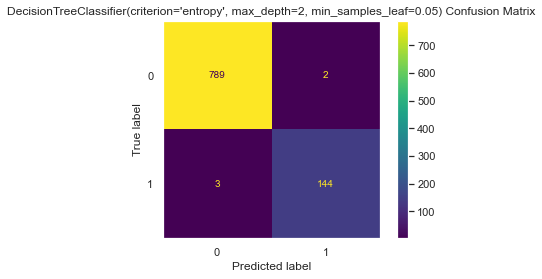

In [34]:
confusion_plot(dt_tuned, X_test, y_test)

Text(0.5, 0, 'Relative Importance')

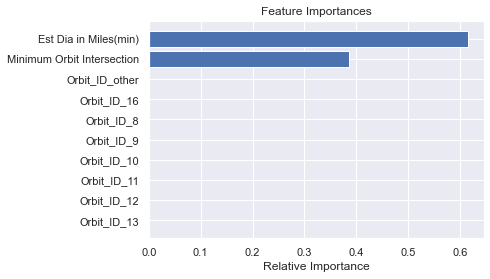

In [35]:
#plotting feature importnace
features= X.columns
importances = dt_tuned.feature_importances_
indices = np.argsort(importances)

#customizeding number 
num_features = 10 

plt.title('Feature Importances')
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')

In [36]:
#random forest

#hyperparameter options
rf_params = {'max_depth': np.arange(0, 20, 1),
             'criterion': ['gini', 'entropy'],
             'min_samples_leaf': np.arange(0, 1, 0.05),
             'n_estimators': np.arange(0, 10, 1)}

#GrideSearcCV
rf_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_params,
                       scoring='accuracy', cv=5)
rf_grid.fit(X_train_res1, y_train_res1)
rf_opt_param = rf_grid.best_params_
rf_best_score = (rf_grid.best_score_*100).round(2)
rf_best_est = rf_grid.best_estimator_
rf_feat_imp = rf_best_est.feature_importances_

# Score on holdout data
rf_holdout_score = (rf_grid.score(X_test, y_test)*100).round(2)

print('Optimal Hyperparameters:')
print(rf_opt_param)
print('Optimal Estimator:')
print(rf_best_est)
print('\n')
print('Training Accuracy {}'.format(rf_best_score))
print('Testing Accuracy {}'.format(rf_holdout_score))

Optimal Hyperparameters:
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 0.05, 'n_estimators': 5}
Optimal Estimator:
RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=0.05,
                       n_estimators=5)


Training Accuracy 99.27
Testing Accuracy 97.97


Accuracy: 0.9414, 
Precision: 0.7421,
Recall: 0.9592,
F1 Score: 0.8368
None


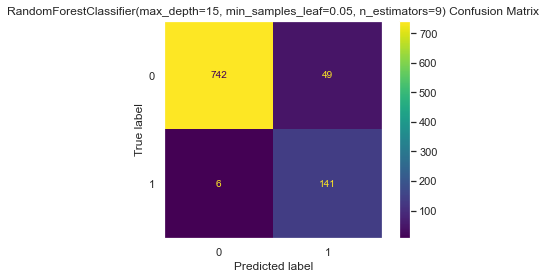

In [37]:
#creating the Random Forest once more with tunes hyperparameters
rf_tuned = RandomForestClassifier(criterion = 'gini', max_depth = 15, min_samples_leaf = 0.05, n_estimators = 9)
rf_tuned.fit(X_train_res1, y_train_res1)
y_predict = rf_tuned.predict(X_test)

print(class_metrics(y_test,y_predict))
confusion_plot(rf_tuned, X_test, y_test)

Text(0.5, 0, 'Relative Importance')

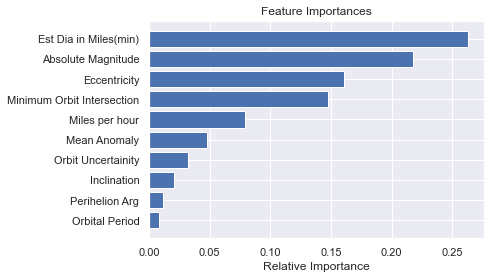

In [38]:
#plotting feature importnace
features= X.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

#customizeding number 
num_features = 10 

plt.title('Feature Importances')
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')

In [39]:
#XGBoost

#hyperparameter options
xgb_params = {'max_depth': np.arange(0, 5, 1),
              'objective': ['binary:logistic'],
              'alpha': [0, 0.01, 0.1, 1],
              'lambda': [0, 0.01, 0.1, 1],
              'subsample': [0.25, 0.5, 0.75],
              'colsample_bytree': [0.25, 0.5, 0.75],
              'eval_metric': ['logloss']}

#GrideSearcCV
xgb_grid = GridSearchCV(estimator=XGBClassifier(), param_grid=xgb_params,
                            scoring='accuracy', cv=5)
xgb_grid.fit(X_train_res1, y_train_res1)
xgb_opt_param = xgb_grid.best_params_
xgb_best_score = (xgb_grid.best_score_*100).round(2)
xgb_best_est = xgb_grid.best_estimator_
xgb_feat_imp = xgb_best_est.feature_importances_

#Score on holdout data
xgb_holdout_score = (xgb_grid.score(X_test, y_test)*100).round(2)

print('Optimal Hyperparameters:')
print(xgb_opt_param)
print('Optimal Estimator:')
print(xgb_best_est)
print('\n')
print('Training Accuracy {}'.format(xgb_best_score))
print('Testing Accuracy {}'.format(xgb_holdout_score))

Optimal Hyperparameters:
{'alpha': 1, 'colsample_bytree': 0.75, 'eval_metric': 'logloss', 'lambda': 0.1, 'max_depth': 3, 'objective': 'binary:logistic', 'subsample': 0.5}
Optimal Estimator:
XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', lambda=0.1, learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=1,
              reg_lambda=0.100000001, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)


Training Accuracy 99.78
Testing Accuracy 99.36


Accuracy: 0.9947, 
Precision: 0.9797,
Recall: 0.9864,
F1 Score: 0.9831
None


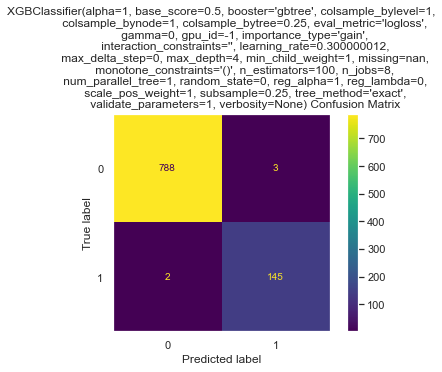

In [40]:
#creating the Random Forest once more with tunes hyperparameters
xgb_tuned = XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.25, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=1, reg_lambda=0,
              scale_pos_weight=1, subsample=0.25, tree_method='exact',
              validate_parameters=1, verbosity=None)
xgb_tuned.fit(X_train_res1, y_train_res1)
y_predict = xgb_tuned.predict(X_test)

print(class_metrics(y_test,y_predict))
confusion_plot(xgb_tuned, X_test, y_test)

Text(0.5, 0, 'Relative Importance')

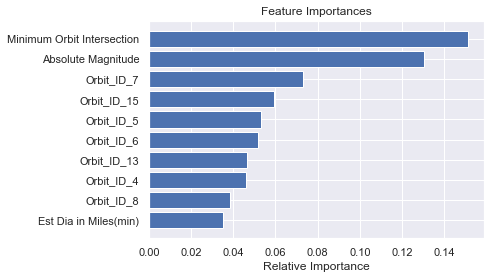

In [41]:
#plotting feature importnace
features= X.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

#customizeding number 
num_features = 10 

plt.title('Feature Importances')
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')

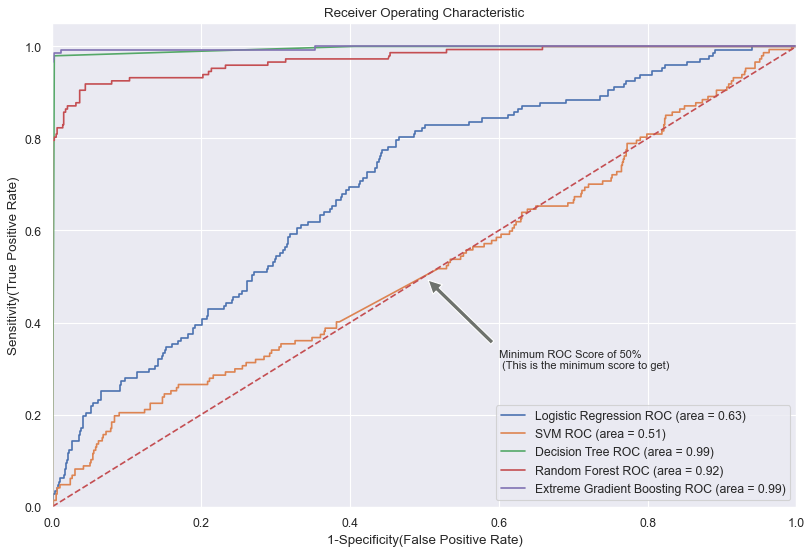

In [42]:
from sklearn.metrics import roc_curve

#plotting ROC curve

plt.figure(figsize=(12, 8), dpi=80)

models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(C=100),
},
{
    'label': 'SVM',
    'model': SVC(probability=True),
},
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, min_samples_leaf = 0.05),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(criterion = 'gini', max_depth = 15, min_samples_leaf = 0.05, n_estimators = 9),
},
{
    'label': 'Extreme Gradient Boosting',
    'model': XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.25, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=1, reg_lambda=0,
              scale_pos_weight=1, subsample=0.25, tree_method='exact',
              validate_parameters=1, verbosity=None),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_res1, y_train_res1) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                 arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.show()   # Display